In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
# Load the data
df = pd.read_csv('customer_lifetime_value_data.csv')
df.head(5)

,Customer_ID,Acquisition_Date,Total_Revenue,Number_of_Purchases,Tenure_Months,Discount_Rate(%),Churn_Status,Satisfaction_Score,Visit_Frequency
0,1390,2015-10-07,NaN,5,93,4.392795,0,2.948184,3.874897
1,1656,2019-02-08,2974.249278,32,40,19.695918,0,9.111982,9.731246
2,7118,2019-01-05,5466.481346,7,36,12.541254,0,1.248957,9.305309
3,8127,2015-10-23,8180.185798,53,100,12.169758,0,9.954624,8.107292
4,6266,2018-09-05,7382.723460,7,49,16.009657,0,9.956788,4.417862


In [ ]:
As it can be seen that the dataset  contains missing values and might have other data issues

In [25]:
print("Missing data:\n", df.isnull().sum())


Missing data:
 Customer_ID               0
Acquisition_Date          0
Total_Revenue          2011
Number_of_Purchases       0
Tenure_Months             0
Discount_Rate(%)       2008
Churn_Status              0
Satisfaction_Score     2013
Visit_Frequency           0
dtype: int64


In [26]:
# Handling missing values using SimpleImputer (filling with mean for numerical data)
imputer = SimpleImputer(strategy='mean')
df['Total_Revenue'] = imputer.fit_transform(df[['Total_Revenue']])
df['Discount_Rate(%)'] = imputer.fit_transform(df[['Discount_Rate(%)']])
df['Satisfaction_Score'] = imputer.fit_transform(df[['Satisfaction_Score']])

In [27]:
#for duplicates
# Drop duplicates
df.drop_duplicates(inplace=True)

In [28]:
# Check for missing data again
print("Missing data:\n", df.isnull().sum())

Missing data:
 Customer_ID            0
Acquisition_Date       0
Total_Revenue          0
Number_of_Purchases    0
Tenure_Months          0
Discount_Rate(%)       0
Churn_Status           0
Satisfaction_Score     0
Visit_Frequency        0
dtype: int64


In [30]:
df.describe()


,Customer_ID,Total_Revenue,Number_of_Purchases,Tenure_Months,Discount_Rate(%),Churn_Status,Satisfaction_Score,Visit_Frequency
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5485.626000,5017.603416,50.108150,59.801500,10.304542,0.201350,5.552184,5.057437
std,2600.877312,2724.866849,28.759724,34.566973,6.340302,0.401019,2.465744,2.854274
min,1000.000000,50.055090,1.000000,1.000000,0.000000,0.000000,1.000142,0.100065
25%,3218.750000,2800.435506,25.000000,30.000000,7.057974,0.000000,3.540054,2.593461
50%,5503.000000,5016.896404,50.000000,60.000000,10.525696,0.000000,5.551134,5.049331
75%,7728.000000,7244.706076,75.000000,90.000000,13.011625,0.000000,7.567322,7.510781
max,9998.000000,9999.722866,99.000000,119.000000,100.000000,1.000000,9.999904,9.998863


In [9]:
#as we can see discount rate's maximum value is 290 which is not possible.

In [29]:
# Capping outliers in Discount Rate to be between 0% and 100%
df['Discount_Rate(%)'] = df['Discount_Rate(%)'].clip(0, 100)

In [31]:
# to calculate CLV

# Create a new column for CLV (which will be our target variable)
df['CLV'] = df['Total_Revenue'] * df['Number_of_Purchases']


In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
#Logistic regression is sensitive to feature scaling, so we scale the numeric features for better efficiency of model


In [33]:
# Features to scale
numeric_features = ['Total_Revenue', 'Number_of_Purchases', 'Tenure_Months', 'Discount_Rate(%)', 'Satisfaction_Score', 'Visit_Frequency']

# Apply StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [ ]:
# We are using Polynomial Regression (since CLV is continuous) and compare it with Logistic Regression (if we need to classify customers as "high-value" vs. "low-value").

In [34]:
# Define the features (X) and the target (y)
X = df[numeric_features]
y = df['CLV']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Create Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the model
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)

# Predict on test data
y_pred = poly_reg_model.predict(X_poly_test)



In [36]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Polynomial Regression MSE:", mse)
print("Polynomial Regression R2 Score:", r2)


Polynomial Regression MSE: 7.826390008746217e-19
Polynomial Regression R2 Score: 1.0


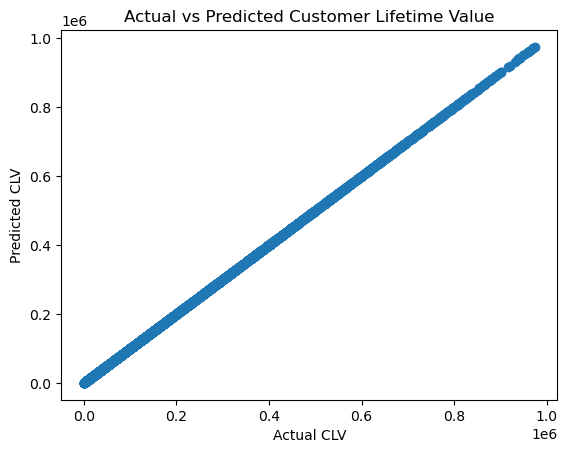

In [37]:
#Plot Predicted vs Actual Values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted Customer Lifetime Value")
plt.show()


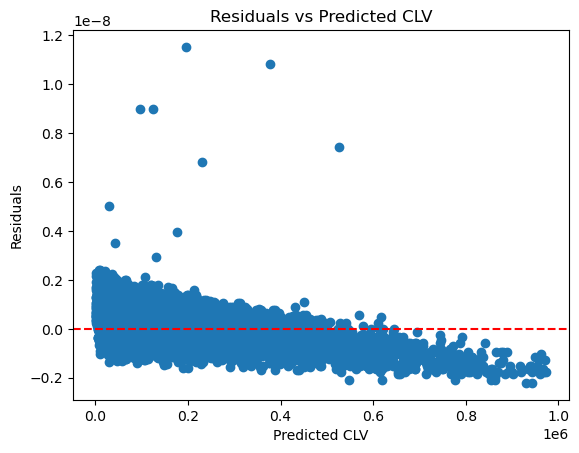

In [38]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CLV")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted CLV")
plt.show()


In [39]:
# Select 5 random test samples
random_indices = np.random.choice(X_test.index, size=5, replace=False)
X_sample = X_test.loc[random_indices]

# Predict the CLV for these samples
y_sample_pred = poly_reg_model.predict(poly.transform(X_sample))

# Display the predictions alongside actual values
sample_results = pd.DataFrame({
    'Actual CLV': y_test.loc[random_indices],
    'Predicted CLV': y_sample_pred
})

print("Predictions for 5 Random Test Samples:")
print(sample_results)


Predictions for 5 Random Test Samples:
          Actual CLV  Predicted CLV
6674   329605.012279  329605.012279
12846  216444.930530  216444.930530
6079   468241.697924  468241.697924
963    646376.441636  646376.441636
11349    2229.349653    2229.349653
